## Exploratory Data Analysis

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap

import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import (StandardScaler, MinMaxScaler)
from sklearn.preprocessing import QuantileTransformer

import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50
pd.set_option('max_columns', None)

pd.set_option('display.float_format', lambda x: '%0.4f' % x)

### Import dataset

In [2]:
df = pd.read_excel('Data/Data_MidTerm_Project_Real_State_Regression.xls')
df

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.0000,1180,5650,1.0000,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.2570,1340,5650,221900
1,6414100192,2014-12-09,3,2.2500,2570,7242,2.0000,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.3190,1690,7639,538000
2,5631500400,2015-02-25,2,1.0000,770,10000,1.0000,0,0,3,6,770,0,1933,0,98028,47.7379,-122.2330,2720,8062,180000
3,2487200875,2014-12-09,4,3.0000,1960,5000,1.0000,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.3930,1360,5000,604000
4,1954400510,2015-02-18,3,2.0000,1680,8080,1.0000,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.0450,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,3,2.5000,1530,1131,3.0000,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.3460,1530,1509,360000
21593,6600060120,2015-02-23,4,2.5000,2310,5813,2.0000,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.3620,1830,7200,400000
21594,1523300141,2014-06-23,2,0.7500,1020,1350,2.0000,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.2990,1020,2007,402101
21595,291310100,2015-01-16,3,2.5000,1600,2388,2.0000,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.0690,1410,1287,400000


In [6]:
# df['renov_yn'] = np.where(df.yr_renovated != 0, 1, 0)

/var/folders/nx/7crq4wx155z00jtfy6fbs9bw0000gn/T/ipykernel_20091/2751150776.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['renov_yn'] = np.where(df.yr_renovated != 0, 1, 0)


In [7]:
corr_matrix = df.corr(method='spearman').abs()
corr_matrix

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,index_living,renov_yn
id,1.0000,0.0081,0.0122,0.0013,0.1171,0.0138,0.0035,0.0106,0.0216,0.0162,0.0028,0.0000,0.0226,0.0178,0.0034,0.0025,0.0035,0.0010,0.1143,0.0013,0.1214,0.0179
bedrooms,0.0081,1.0000,0.5430,0.6419,0.1852,0.2814,0.0123,0.0776,0.0064,0.4013,0.5343,0.2381,0.2292,0.0107,0.1559,0.0092,0.1764,0.4340,0.1705,0.3512,0.2192,0.0098
bathrooms,0.0122,0.5430,1.0000,0.7720,0.1039,0.5528,0.0500,0.1591,0.1558,0.6657,0.7137,0.1923,0.5770,0.0455,0.2195,0.0012,0.2891,0.5988,0.0960,0.5035,0.3713,0.0442
sqft_living,0.0013,0.6419,0.7720,1.0000,0.2840,0.4630,0.0689,0.2314,0.0835,0.7422,0.8435,0.3313,0.4102,0.0474,0.1945,0.0456,0.2751,0.7443,0.2630,0.6531,0.3123,0.0468
sqft_lot,0.1171,0.1852,0.1039,0.2840,1.0000,0.1596,0.0880,0.1159,0.0789,0.1915,0.2579,0.0451,0.0560,0.0015,0.3050,0.1020,0.3478,0.3350,0.9154,0.0828,0.7655,0.0006
floors,0.0138,0.2814,0.5528,0.4630,0.1596,1.0000,0.0278,0.0278,0.2656,0.5026,0.6601,0.2840,0.5164,0.0234,0.0939,0.0019,0.2077,0.3721,0.1593,0.3369,0.4423,0.0234
waterfront,0.0035,0.0123,0.0500,0.0689,0.0880,0.0278,1.0000,0.2856,0.0161,0.0631,0.0522,0.0550,0.0257,0.0928,0.0310,0.0170,0.0421,0.0734,0.0952,0.1158,0.0412,0.0945
view,0.0106,0.0776,0.1591,0.2314,0.1159,0.0278,0.2856,1.0000,0.0420,0.2195,0.1399,0.2409,0.0598,0.0963,0.0818,0.0028,0.1079,0.2557,0.1152,0.2942,0.0393,0.0970
condition,0.0216,0.0064,0.1558,0.0835,0.0789,0.2656,0.0161,0.0420,1.0000,0.1611,0.1774,0.1656,0.3765,0.0711,0.0098,0.0124,0.1083,0.1113,0.0830,0.0182,0.1271,0.0694
grade,0.0162,0.4013,0.6657,0.7422,0.1915,0.5026,0.0631,0.2195,0.1611,1.0000,0.7341,0.0931,0.5048,0.0177,0.1945,0.0989,0.2488,0.6929,0.1940,0.6607,0.2705,0.0165


In [8]:
df.price.describe()

count     20809.0000
mean     541649.4661
std      371762.5346
min       78000.0000
25%      320000.0000
50%      450000.0000
75%      650000.0000
max     7700000.0000
Name: price, dtype: float64

In [9]:
#price_cutoff =np.percentile(df.price.values, 99.7)

In [58]:
#df.price = np.where(df.price > price_cutoff, price_cutoff, df.price)

In [ ]:
df.price.hist()

In [11]:
df.price = np.log(df.price.values)

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


<AxesSubplot:>

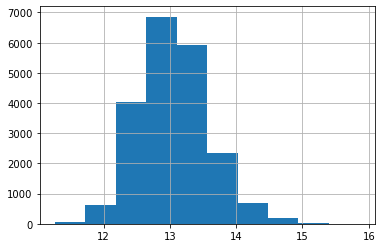

In [12]:
df.price.hist()

<AxesSubplot:ylabel='Count'>

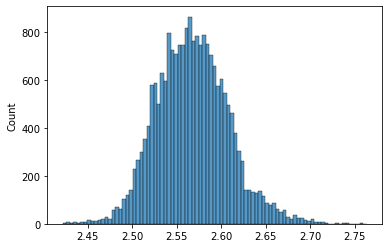

In [13]:
sns.histplot(np.log(df.price.values))

### Columns type

### Drop not relevant columns

In [14]:
df = df.drop(['id','lat', 'long', 'date', 'bedrooms', 'sqft_lot', 'floors', 'condition', 'sqft_above', 'sqft_basement', 'yr_renovated', 'sqft_living15', 'sqft_lot15'], axis=1)
df

,bathrooms,sqft_living,waterfront,view,grade,yr_built,zipcode,price,index_living,renov_yn
0,1.0000,1180,0,0,7,1955,98178,12.3100,0.2088,0
1,2.2500,2570,0,0,7,1951,98125,13.1956,0.3549,1
2,1.0000,770,0,0,6,1933,98028,12.1007,0.0770,0
3,3.0000,1960,0,0,7,1965,98136,13.3113,0.3920,0
4,2.0000,1680,0,0,8,1987,98074,13.1422,0.2079,0
...,...,...,...,...,...,...,...,...,...,...
21590,3.5000,3510,0,0,9,2009,98136,13.8255,0.4875,0
21593,2.5000,2310,0,0,8,2014,98146,12.8992,0.3974,0
21594,0.7500,1020,0,0,7,2009,98144,12.9045,0.7556,0
21595,2.5000,1600,0,0,8,2004,98027,12.8992,0.6700,0


### Checking Columns

In [15]:
df = df.drop(15856).reset_index(drop=True)

In [16]:
df

,bathrooms,sqft_living,waterfront,view,grade,yr_built,zipcode,price,index_living,renov_yn
0,1.0000,1180,0,0,7,1955,98178,12.3100,0.2088,0
1,2.2500,2570,0,0,7,1951,98125,13.1956,0.3549,1
2,1.0000,770,0,0,6,1933,98028,12.1007,0.0770,0
3,3.0000,1960,0,0,7,1965,98136,13.3113,0.3920,0
4,2.0000,1680,0,0,8,1987,98074,13.1422,0.2079,0
...,...,...,...,...,...,...,...,...,...,...
20803,3.5000,3510,0,0,9,2009,98136,13.8255,0.4875,0
20804,2.5000,2310,0,0,8,2014,98146,12.8992,0.3974,0
20805,0.7500,1020,0,0,7,2009,98144,12.9045,0.7556,0
20806,2.5000,1600,0,0,8,2004,98027,12.8992,0.6700,0


In [17]:
df['bathrooms'].value_counts()

2.5000    5127
1.0000    3847
1.7500    2999
2.2500    1887
2.0000    1876
1.5000    1373
2.7500    1158
3.0000     700
3.5000     688
3.2500     521
3.7500     153
4.0000     132
4.5000      99
4.2500      79
0.7500      71
4.7500      23
5.0000      20
5.2500      13
5.5000      10
1.2500       8
6.0000       6
0.5000       4
5.7500       4
6.7500       2
8.0000       2
6.2500       2
6.5000       2
7.5000       1
7.7500       1
Name: bathrooms, dtype: int64

In [18]:
df['bathrooms'] = round(df['bathrooms'])
df['bathrooms'] = np.where(df['bathrooms'] == 0, 1, df['bathrooms'])
df['bathrooms'] = np.where(df['bathrooms'] > 5, 5, df['bathrooms'])

## Data Cleaning

### Transform yr_built and yr_renovated

In [19]:
df['yr_built']= list(map(lambda x: 2015-x, df['yr_built']))

In [20]:
df['yr_built']

0        60
1        64
2        82
3        50
4        28
         ..
20803     6
20804     1
20805     6
20806    11
20807     7
Name: yr_built, Length: 20808, dtype: int64

In [21]:
df.rename(columns = {'yr_built' : 'age_build'}, inplace=True)

In [22]:
df

,bathrooms,sqft_living,waterfront,view,grade,age_build,zipcode,price,index_living,renov_yn
0,1.0000,1180,0,0,7,60,98178,12.3100,0.2088,0
1,2.0000,2570,0,0,7,64,98125,13.1956,0.3549,1
2,1.0000,770,0,0,6,82,98028,12.1007,0.0770,0
3,3.0000,1960,0,0,7,50,98136,13.3113,0.3920,0
4,2.0000,1680,0,0,8,28,98074,13.1422,0.2079,0
...,...,...,...,...,...,...,...,...,...,...
20803,4.0000,3510,0,0,9,6,98136,13.8255,0.4875,0
20804,2.0000,2310,0,0,8,1,98146,12.8992,0.3974,0
20805,1.0000,1020,0,0,7,6,98144,12.9045,0.7556,0
20806,2.0000,1600,0,0,8,11,98027,12.8992,0.6700,0


### Transform zipcode

In [27]:
price_zip_mean = df.groupby(['zipcode'])['price'].mean()
price_zip_mean.sort_values(ascending=False)

zipcode
98039   14.4704
98004   14.0179
98040   13.9030
98112   13.8259
98109   13.6359
          ...  
98023   12.5124
98001   12.4931
98032   12.3982
98168   12.3445
98002   12.3377
Name: price, Length: 70, dtype: float64

In [28]:
price_zip = df.groupby(['zipcode'])['price'].mean()
pz = price_zip.sort_values(ascending=False).reset_index()
pz

,zipcode,price
0,98039,14.4704
1,98004,14.0179
2,98040,13.9030
3,98112,13.8259
4,98109,13.6359
...,...,...
65,98023,12.5124
66,98001,12.4931
67,98032,12.3982
68,98168,12.3445


In [29]:
df

,bathrooms,sqft_living,waterfront,view,grade,age_build,zipcode,price,index_living,renov_yn
0,1.0000,1180,0,0,7,60,98178,12.3100,0.2088,0
1,2.0000,2570,0,0,7,64,98125,13.1956,0.3549,1
2,1.0000,770,0,0,6,82,98028,12.1007,0.0770,0
3,3.0000,1960,0,0,7,50,98136,13.3113,0.3920,0
4,2.0000,1680,0,0,8,28,98074,13.1422,0.2079,0
...,...,...,...,...,...,...,...,...,...,...
20803,4.0000,3510,0,0,9,6,98136,13.8255,0.4875,0
20804,2.0000,2310,0,0,8,1,98146,12.8992,0.3974,0
20805,1.0000,1020,0,0,7,6,98144,12.9045,0.7556,0
20806,2.0000,1600,0,0,8,11,98027,12.8992,0.6700,0


In [30]:
Q1 = np.percentile(pz['price'], 10)
Q2 = np.percentile(pz['price'], 20)
Q3 = np.percentile(pz['price'], 30)
Q4 = np.percentile(pz['price'], 40)
Q5 = np.percentile(pz['price'], 50)
Q6 = np.percentile(pz['price'], 60)
Q7 = np.percentile(pz['price'], 70)
Q8 = np.percentile(pz['price'], 80)
Q9 = np.percentile(pz['price'], 90)

In [31]:
pz['quantile_zip'] = "1"
pz['quantile_zip'] = np.where(pz['price'] >= Q1, "2", pz['quantile_zip'])
pz['quantile_zip'] = np.where(pz['price'] >= Q2, "3", pz['quantile_zip'])
pz['quantile_zip'] = np.where(pz['price'] >= Q3, "4", pz['quantile_zip'])
pz['quantile_zip'] = np.where(pz['price'] >= Q4, "5", pz['quantile_zip'])
pz['quantile_zip'] = np.where(pz['price'] >= Q5, "6", pz['quantile_zip'])
pz['quantile_zip'] = np.where(pz['price'] >= Q6, "7", pz['quantile_zip'])
pz['quantile_zip'] = np.where(pz['price'] >= Q7, "8", pz['quantile_zip'])
pz['quantile_zip'] = np.where(pz['price'] >= Q8, "9", pz['quantile_zip'])
pz['quantile_zip'] = np.where(pz['price'] >= Q9, "10", pz['quantile_zip'])

In [32]:
pz

,zipcode,price,quantile_zip
0,98039,14.4704,10
1,98004,14.0179,10
2,98040,13.9030,10
3,98112,13.8259,10
4,98109,13.6359,10
...,...,...,...
65,98023,12.5124,1
66,98001,12.4931,1
67,98032,12.3982,1
68,98168,12.3445,1


In [33]:
pz.groupby('quantile_zip').count()

,zipcode,price
quantile_zip,,
1,7,7
10,7,7
2,7,7
3,7,7
4,7,7
5,7,7
6,7,7
7,7,7
8,7,7


In [34]:
df = pd.merge(df, pz[['zipcode', 'quantile_zip']], on='zipcode', how='inner').sample(frac=1).reset_index(drop=True)

In [35]:
df

,bathrooms,sqft_living,waterfront,view,grade,age_build,zipcode,price,index_living,renov_yn,quantile_zip
0,1.0000,1740,0,0,7,91,98118,12.6603,0.4804,0,4
1,2.0000,2050,0,0,6,59,98198,13.0711,0.2010,0,2
2,1.0000,1240,0,1,6,72,98070,12.7799,0.0459,0,5
3,2.0000,2540,0,0,9,18,98075,13.3535,0.2918,0,9
4,2.0000,960,0,0,7,53,98052,12.8347,0.1184,0,8
...,...,...,...,...,...,...,...,...,...,...,...
20803,2.0000,3300,0,3,8,82,98040,14.0387,0.2146,1,10
20804,2.0000,2090,0,0,8,15,98056,12.9360,0.3457,0,4
20805,2.0000,2520,0,0,10,27,98074,13.2879,0.2465,0,9
20806,3.0000,4330,0,0,10,30,98074,13.4909,0.2966,0,9


In [36]:
df = df.drop(columns=['zipcode'], axis=1)

In [37]:
scaler = MinMaxScaler()
df['sqft_living'] = scaler.fit_transform(df[['sqft_living']])

In [38]:
df

,bathrooms,sqft_living,waterfront,view,grade,age_build,price,index_living,renov_yn,quantile_zip
0,1.0000,0.1040,0,0,7,91,12.6603,0.4804,0,4
1,2.0000,0.1276,0,0,6,59,13.0711,0.2010,0,2
2,1.0000,0.0661,0,1,6,72,12.7799,0.0459,0,5
3,2.0000,0.1648,0,0,9,18,13.3535,0.2918,0,9
4,2.0000,0.0448,0,0,7,53,12.8347,0.1184,0,8
...,...,...,...,...,...,...,...,...,...,...
20803,2.0000,0.2225,0,3,8,82,14.0387,0.2146,1,10
20804,2.0000,0.1306,0,0,8,15,12.9360,0.3457,0,4
20805,2.0000,0.1632,0,0,10,27,13.2879,0.2465,0,9
20806,3.0000,0.3007,0,0,10,30,13.4909,0.2966,0,9


## Linear Regression (trial 5)

#### XY Split

In [39]:
X5=df.drop('price', axis=1)
X5
y5=df.price
y5

0       12.6603
1       13.0711
2       12.7799
3       13.3535
4       12.8347
          ...  
20803   14.0387
20804   12.9360
20805   13.2879
20806   13.4909
20807   12.5282
Name: price, Length: 20808, dtype: float64

In [40]:
X5

,bathrooms,sqft_living,waterfront,view,grade,age_build,index_living,renov_yn,quantile_zip
0,1.0000,0.1040,0,0,7,91,0.4804,0,4
1,2.0000,0.1276,0,0,6,59,0.2010,0,2
2,1.0000,0.0661,0,1,6,72,0.0459,0,5
3,2.0000,0.1648,0,0,9,18,0.2918,0,9
4,2.0000,0.0448,0,0,7,53,0.1184,0,8
...,...,...,...,...,...,...,...,...,...
20803,2.0000,0.2225,0,3,8,82,0.2146,1,10
20804,2.0000,0.1306,0,0,8,15,0.3457,0,4
20805,2.0000,0.1632,0,0,10,27,0.2465,0,9
20806,3.0000,0.3007,0,0,10,30,0.2966,0,9


In [41]:
df.columns

Index(['bathrooms', 'sqft_living', 'waterfront', 'view', 'grade', 'age_build',
       'price', 'index_living', 'renov_yn', 'quantile_zip'],
      dtype='object')

#### Data Splitting

In [42]:
X_train5, X_test5, y_train5, y_test5 = train_test_split(X5, y5, test_size=.30,random_state=123)

#### Standardize

In [43]:
std_scaler5 = StandardScaler().fit(X_train5) 

X_train_scaled5 = std_scaler5.transform(X_train5)

In [44]:
X_test_scaled5 = std_scaler5.transform(X_test5)

In [45]:
print(X_train_scaled5)
print("--------")
print(X_test_scaled5)

[[-0.06419385  1.3594383  -0.09076108 ... -1.3933445  -0.21734535
  -0.89424609]
 [ 1.26959141  1.42360557 -0.09076108 ... -0.37630162 -0.21734535
   0.20479149]
 [ 1.26959141  2.8032019  -0.09076108 ... -0.74305265 -0.21734535
  -0.16155437]
 ...
 [-0.06419385 -0.53349619 -0.09076108 ...  1.68430204 -0.21734535
   0.93748321]
 [-0.06419385 -1.02544527 -0.09076108 ... -0.66164367 -0.21734535
  -1.26059195]
 [-0.06419385 -0.26613256 -0.09076108 ...  0.59122084 -0.21734535
  -1.26059195]]
--------
[[ 2.60337666  1.88347102 -0.09076108 ... -0.18349646 -0.21734535
   1.30382907]
 [ 1.26959141  0.8140165  -0.09076108 ...  1.26215695 -0.21734535
   0.93748321]
 [-0.06419385  0.25790015 -0.09076108 ... -1.26528755 -0.21734535
  -1.26059195]
 ...
 [ 1.26959141  1.84069284 -0.09076108 ...  0.94602043 -0.21734535
   1.67017493]
 [-0.06419385 -0.90780527 -0.09076108 ... -0.59575757 -0.21734535
   0.20479149]
 [-0.06419385  0.6001256  -0.09076108 ... -0.19964248 -0.21734535
   0.20479149]]


In [46]:
X_train_const_scaled5 = sm.add_constant(X_train_scaled5) 

model5 = sm.OLS(y_train5, X_train_const_scaled5).fit()
predictions_train5 = model5.predict(X_train_const_scaled5) 

X_test_const_scaled5 = sm.add_constant(X_test_scaled5) 
predictions_test5 = model5.predict(X_test_const_scaled5) 
print_model5 = model5.summary()
print(print_model5)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     8394.
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        17:38:58   Log-Likelihood:                 1762.4
No. Observations:               14565   AIC:                            -3505.
Df Residuals:                   14555   BIC:                            -3429.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0491      0.002   7343.036      0.0

#### Model validation

In [47]:
#using sklearn
model5=LinearRegression()    # model
model5.fit(X_train_scaled5, y_train5)   # model train

LinearRegression()

In [48]:
model5.coef_ #gives you per column the slope (alpha)

array([0.02883771, 0.17197061, 0.03955915, 0.05195379, 0.14149407,
       0.07072968, 0.01774783, 0.00661633, 0.26169321])

In [49]:
model5.intercept_ #gives the optimal slope

13.049102660827863

In [50]:
R2_test5 = model5.score(X_test_scaled5,y_test5) # measure R2
R2_test5

0.8343855562807261

In [51]:
# Making prediction
y_pred5 = model5.predict(X_test_scaled5)
y_pred5

array([14.34903804, 13.54716663, 12.74006755, ..., 14.02862658,
       12.838142  , 13.28838059])

In [52]:
y_test5

6155    14.3461
15911   13.4870
6781    12.5776
8307    12.7939
18724   13.6231
          ...  
1962    13.1224
7925    12.8942
11530   14.2979
18701   12.7883
16197   13.2963
Name: price, Length: 6243, dtype: float64

In [53]:
result=pd.DataFrame({"y_test":y_test5,"y_pred":y_pred5})

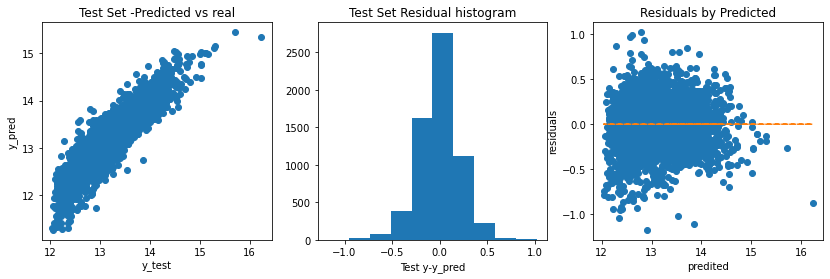

In [54]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred5, y_test5, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test5 - y_pred5)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred5,y_test5 - y_pred5,"o")
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred5,np.zeros(len(y_pred5)),linestyle='dashed')

<AxesSubplot:xlabel='y_pred', ylabel='y_test'>

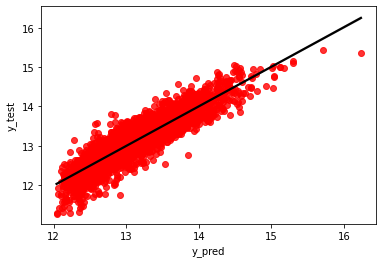

In [55]:
sns.regplot(x='y_pred',y='y_test', data=result, scatter_kws={"color": "red"}, line_kws={"color": "black"})

#### Error metrics

In [56]:
print(mse(y_test5,y_pred5))
print(mae(y_test5,y_pred5))

0.046337944276719195
0.16147573483314634


#### Features Importance

In [57]:
features_importances5 = pd.DataFrame(data={
    'Attribute': X_train5.columns,
    'Importance': abs(model5.coef_)
})
features_importances5 = features_importances5.sort_values(by='Importance', ascending=False)
features_importances5

,Attribute,Importance
8,quantile_zip,0.2617
1,sqft_living,0.1720
4,grade,0.1415
5,age_build,0.0707
3,view,0.0520
2,waterfront,0.0396
0,bathrooms,0.0288
6,index_living,0.0177
7,renov_yn,0.0066
